# Understanding Descriptive Statistics

Import the necessary libraries here:

In [106]:
# Libraries

import pandas as pd
import numpy as np
import random
import statistics
import seaborn as sns
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
# your code here
df=pd.DataFrame(random.choices([1,2,3,4,5,6], k=10), columns=['Rolling a dice'])
df

,Rolling a dice
0,6
1,4
2,1
3,1
4,4
5,1
6,5
7,6
8,3
9,3


#### 2.- Plot the results sorted by value.

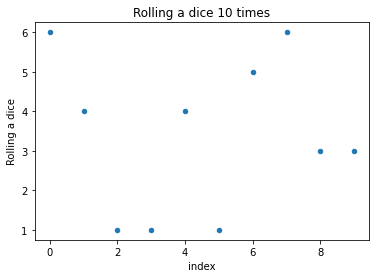

In [3]:
# your code here

df.reset_index().plot(y ='Rolling a dice', x='index' , kind = 'scatter', title='Rolling a dice 10 times');

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

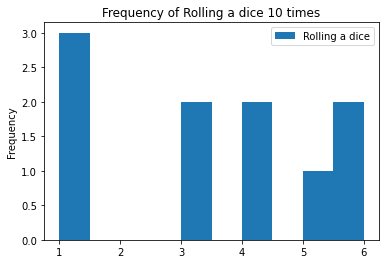

In [4]:
# your code here

df.plot(kind='hist', title='Frequency of Rolling a dice 10 times');

In [5]:
"""
your comments here

The relationship of both plots are the data. We plot the same infirmation in a different way.
The first plot (Rolling a dice 10 times) uses scatter kind and each time we roll a dice with a number between 1 and 6,
is represented with a dot.
The second plot (Frequency) use histogram kind and each bar represent the quantity of any possible observation (1-6).

"""

'\nyour comments here\n\nThe relationship of both plots are the data. We plot the same infirmation in a different way.\nThe first plot (Rolling a dice 10 times) uses scatter kind and each time we roll a dice with a number between 1 and 6,\nis represented with a dot.\nThe second plot (Frequency) use histogram kind and each bar represent the quantity of any possible observation (1-6).\n\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [6]:
# your code here

print(df)
aa=df['Rolling a dice'].tolist()
print(aa)

def my_mean(roll_list):
    a=sum(roll_list)
    b=len(roll_list)
    print (a)
    print (b)
    return a/b

my_mean(aa)


   Rolling a dice
0               6
1               4
2               1
3               1
4               4
5               1
6               5
7               6
8               3
9               3
[6, 4, 1, 1, 4, 1, 5, 6, 3, 3]
34
10


3.4

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [7]:
# your code here
counts=df['Rolling a dice'].value_counts().tolist()
values=df['Rolling a dice'].value_counts().keys().tolist()
print(values)
print(counts)

def mean_1 (counts_1, values_1):
    mean=0
    for i in range(len(values_1)):
        mean = mean + counts_1[i]*values_1[i]
    mean=mean/sum(counts_1)
    return mean

print(mean_1(counts,values))



[1, 6, 4, 3, 5]
[3, 2, 2, 2, 1]
3.4


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [12]:
# your code here
med_list=df['Rolling a dice'].tolist()
med_list.sort()
print(med_list)

def median_1(median_list):
    if (len(median_list)%2==1):                                  # In case the number of observations is odd
        median=median_list[int(len(median_list)/2)]
    else:                                                        # In case the number of observations is even
        median=(median_list[int(len(median_list)/2-1)]+median_list[int(len(median_list)/2)])/2
    return median
        
print(f'median= {median_1(med_list)}')

[1, 1, 1, 3, 3, 4, 4, 5, 6, 6]
median= 3.5


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [13]:
# your code here

# To calculate quartiles we split the dataset in two half from median already calculated.
# The median of full dataset is the quartile 50%.
# To calculate quartile 25% we calculate the median of lower half dataset
# To calculate quartile 75% we calculate the median of upper half dataset
# To calculate quartile 100% is the maximun

def my_Quartiles(my_full_list):
    print(my_full_list)
    my_Q2=median_1(my_full_list)
    print(my_Q2)
    lwr_half_list=[]
    upr_half_list=[]
    full_dimension=len(my_full_list)
    half_dimension=int(full_dimension/2)
    for i in range(half_dimension):
        if (my_full_list[i]<my_Q2):
            lwr_half_list.append(my_full_list[i])
    print(lwr_half_list)
    my_Q1=median_1(lwr_half_list)
    print(my_Q1)
    for i in range(half_dimension,full_dimension):
        if (my_full_list[i]>my_Q2):
            upr_half_list.append(my_full_list[i])
    print(upr_half_list)
    my_Q3=median_1(upr_half_list)
    print(my_Q3)
    my_Q4=my_full_list[full_dimension-1]
    return my_Q1, my_Q2, my_Q3, my_Q4

Q1, Q2, Q3, Q4 = my_Quartiles(med_list)

print(f'Q1={Q1} Q2={Q2} Q3={Q3} Q4={Q4} >> {med_list}')


[1, 1, 1, 3, 3, 4, 4, 5, 6, 6]
3.5
[1, 1, 1, 3, 3]
1
[4, 4, 5, 6, 6]
5
Q1=1 Q2=3.5 Q3=5 Q4=6 >> [1, 1, 1, 3, 3, 4, 4, 5, 6, 6]


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]


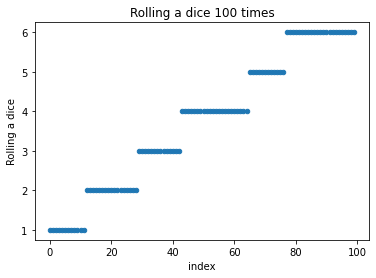

In [14]:
# your code here
df_hundred=pd.read_csv('../data/roll_the_dice_hundred.csv', index_col=0)
my_values=df_hundred['value'].tolist()
my_values.sort()
print(my_values)
df=pd.DataFrame(my_values, columns=['Rolling a dice']).reset_index().plot(y ='Rolling a dice', x='index' , kind = 'scatter', title='Rolling a dice 100 times');

In [16]:
"""
your comments here

I see a six lines (set of dots) and the length of the line represent the quantity of times a value is observed.


"""

'\nyour comments here\n\nI see a six lines (set of dots) and the length of the line represent the quantity of times a value is observed.\n\n\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [17]:
# your code here

my_mean(my_values)

374
100


3.74

#### 3.- Now, calculate the frequency distribution.


In [18]:
# your code here
data = pd.value_counts(df_hundred['value']).to_frame().reset_index()
data.columns=['value','count']
data=data.sort_values(['value'], ascending=True)
data.reset_index(drop=True)


,value,count
0,1,12
1,2,17
2,3,14
3,4,22
4,5,12
5,6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

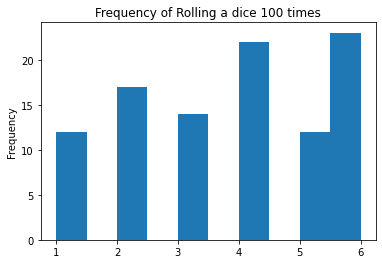

In [22]:
# your code here
df_hundred['value'].plot(kind='hist', title='Frequency of Rolling a dice 100 times');

In [ ]:
"""
your comments here

The mean is 3.74 and is clearly on the right part of the plot because the right part is higher to the left part.
There are quite diferences values between higher and lower values.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [27]:
# your code here
df_thousand=pd.read_csv('../data/roll_the_dice_thousand.csv', index_col=0)

data_t = pd.value_counts(df_thousand['value']).to_frame().reset_index()
data_t.columns=['value','count']
data_t=data_t.sort_values(['value'], ascending=True)
data_t.reset_index(drop=True)


,value,count
0,1,175
1,2,167
2,3,175
3,4,168
4,5,149
5,6,166


In [30]:
my_mean(df_thousand['value'].tolist())

3447
1000


3.447

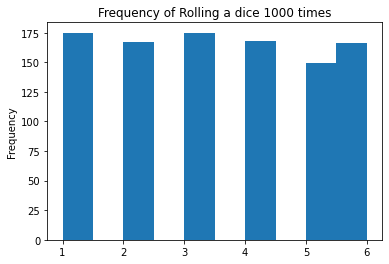

In [38]:
df_thousand['value'].plot(kind='hist', title='Frequency of Rolling a dice 1000 times');

In [ ]:
"""
your comments here

In that case the distribution of observations are very similar between each value. The plot are more uniform.
The mean is closer to the value 3 because the distribution are more uniform than the case before.

The change is the quantity of observation (1000 vs 100). That make the distribution are more closer to the theorical probability
per value (1/6 = 0.166666)
value 1 = 0.175
value 2 = 0.167
value 3 = 0.175
value 4 = 0.168
value 5 = 0.149
value 6 = 0.166

"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [36]:
# your code here
df_population=pd.read_csv('../data/ages_population.csv')
df_population


,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


In [37]:

data_p = pd.value_counts(df_population['observation']).to_frame().reset_index()
data_p.columns=['age','count']
data_p=data_p.sort_values(['age'], ascending=True)
data_p.reset_index(drop=True)

,age,count
0,1.0,2
1,2.0,2
2,4.0,1
3,5.0,2
4,6.0,2
...,...,...
67,69.0,1
68,70.0,1
69,71.0,1
70,73.0,1


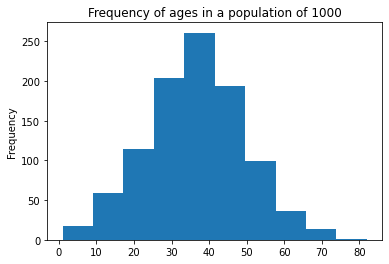

In [39]:
df_population['observation'].plot(kind='hist', title='Frequency of ages in a population of 1000');

In [ ]:
"""

The mean will be in the range of 30-40 years aproximately because of the quantity around these ages are big.
The standard deviation should be around 10 or 15 years.

"""

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [47]:
# your code here
p_mean=my_mean(df_population['observation'].tolist());
p_std_dev=statistics.stdev(df_population['observation'].tolist())
print(f'mean = {p_mean}')
print(f'standard deviation = {p_std_dev}')

36560.0
1000
mean = 36.56
standar deviation = 12.81649962597677


In [ ]:
"""
your comments here

My estimations were correct, but I was not sure about standard deviation.
In that case the estimation of mean is easy because the figure is like a pyramid and the mean should be around the top.
In case of estimation of standard deviation is more dificult because from the mean you have to estimate the average deviation.

In general with a normal distribution like this case is easy.
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [48]:
# your code here
df_population2=pd.read_csv('../data/ages_population2.csv')
df_population2

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


In [50]:
data_p2 = pd.value_counts(df_population2['observation']).to_frame().reset_index()
data_p2.columns=['age','count']
data_p2=data_p2.sort_values(['age'], ascending=True)
data_p2.reset_index(drop=True)

,age,count
0,19.0,3
1,20.0,13
2,21.0,17
3,22.0,35
4,23.0,41
5,24.0,78
6,25.0,98
7,26.0,120
8,27.0,125
9,28.0,139


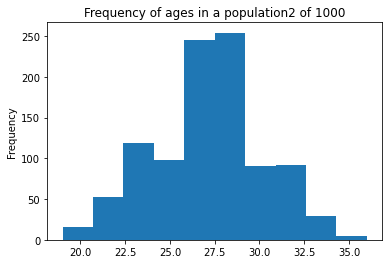

In [51]:
df_population2['observation'].plot(kind='hist', title='Frequency of ages in a population2 of 1000');

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here

In that case the distribution is similar to the case before. Both are more or les a normal distribution. 
The difference is the range of ages 20-35 instead of 1-80. So the mean should be around 27.5 and standard deviation around 3.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [52]:
# your code here
p_mean2=my_mean(df_population2['observation'].tolist());
p_std_dev2=statistics.stdev(df_population2['observation'].tolist())
print(f'mean = {p_mean2}')
print(f'standard deviation = {p_std_dev2}')

27155.0
1000
mean = 27.155
standar deviation = 2.9698139326891835


In [ ]:
"""
your comments here

The distribution of ages are similar the previous data set. You can see more population concentraded around the 27.5 age
than in previous dataset. This population is younger than the first one.

"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [53]:
# your code here
df_population3=pd.read_csv('../data/ages_population3.csv')
df_population3

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


In [54]:
data_p3 = pd.value_counts(df_population3['observation']).to_frame().reset_index()
data_p3.columns=['age','count']
data_p3=data_p3.sort_values(['age'], ascending=True)
data_p3.reset_index(drop=True)

,age,count
0,1.0,1
1,2.0,2
2,4.0,2
3,5.0,1
4,7.0,1
...,...,...
70,73.0,6
71,74.0,6
72,75.0,2
73,76.0,1


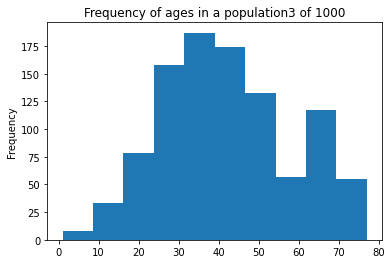

In [55]:
df_population3['observation'].plot(kind='hist', title='Frequency of ages in a population3 of 1000');

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [56]:
# your code here
p_mean3=my_mean(df_population3['observation'].tolist());
p_std_dev3=statistics.stdev(df_population3['observation'].tolist())
print(f'mean = {p_mean3}')
print(f'standard deviation = {p_std_dev3}')

41989.0
1000
mean = 41.989
standard deviation = 16.14470595986593


In [ ]:
"""
your comments here

The ages range in population1 and population3 are the same, but the distribution are similar with small differences.
The mean in population1 is younger than in population3 (27.43 instead of 41.9). So in general the population1 is younger.
The standard deviation is lower in population1 than population3. That means the distribution are less concentrated around the mean
and the population3 are more scattered.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [59]:
# your code here
# To calculate quartiles we split the dataset in two half from median already calculated.
# The median of full dataset is the quartile 50%.
# To calculate quartile 25% we calculate the median of lower half dataset
# To calculate quartile 75% we calculate the median of upper half dataset
# To calculate quartile 100% is the maximun

def my_Quartiles(my_full_list):
    #print(my_full_list)
    my_Q2=median_1(my_full_list)
    #print(my_Q2)
    lwr_half_list=[]
    upr_half_list=[]
    full_dimension=len(my_full_list)
    half_dimension=int(full_dimension/2)
    for i in range(half_dimension):
        if (my_full_list[i]<my_Q2):
            lwr_half_list.append(my_full_list[i])
    #print(lwr_half_list)
    my_Q1=median_1(lwr_half_list)
    #print(my_Q1)
    for i in range(half_dimension,full_dimension):
        if (my_full_list[i]>my_Q2):
            upr_half_list.append(my_full_list[i])
    #print(upr_half_list)
    my_Q3=median_1(upr_half_list)
    #print(my_Q3)
    my_Q4=my_full_list[full_dimension-1]
    return my_Q1, my_Q2, my_Q3, my_Q4

p3_list=df_population3['observation'].tolist()
p3_list.sort()

Q1, Q2, Q3, Q4 = my_Quartiles(p3_list)

print(f'Q1={Q1} Q2={Q2} Q3={Q3} Q4={Q4}')


Q1=30.0 Q2=40.0 Q3=53.0 Q4=77.0


In [ ]:
"""
your comments here

I can see all quartiles on the right part of the plot. That confirms the age of population3 is older than population1 and 

"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [66]:
# your code here

# We calculate percentiles

Perc_5th=p3_list[49]
Perc_10th=p3_list[99]
Perc_20th=p3_list[199]
Perc_30th=p3_list[299]
Perc_40th=p3_list[399]
Perc_50th=p3_list[499]
Perc_60th=p3_list[599]
Perc_70th=p3_list[699]
Perc_80th=p3_list[799]
Perc_90th=p3_list[899]
Perc_95th=p3_list[949]


print(f'5th={Perc_5th} - 10th={Perc_10th} - 20th={Perc_20th} - 30th={Perc_30th} - 40th={Perc_40th} - 50th={Perc_50th} - 60th={Perc_60th} - 70th={Perc_70th} - 80th={Perc_80th} - 90th={Perc_90th} - 95th={Perc_95th}')


5th=17.0 - 10th=22.0 - 20th=28.0 - 30th=32.0 - 40th=36.0 - 50th=40.0 - 60th=45.0 - 70th=50.0 - 80th=57.0 - 90th=67.0 - 95th=70.0


In [ ]:
"""
your comments here

If we calculate a collection of percentiles (5th, 10th, 20th, 30th, ... 90th, 95th) we can know the information about spread 
of population according to the age like outliers.
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

Q1=28.0 Q2=37.0 Q3=45.0 Q4=82.0 of Population 1
Q1=25.0 Q2=27.0 Q3=29.0 Q4=36.0 of Population 2
Q1=30.0 Q2=40.0 Q3=53.0 Q4=77.0 of Population 3


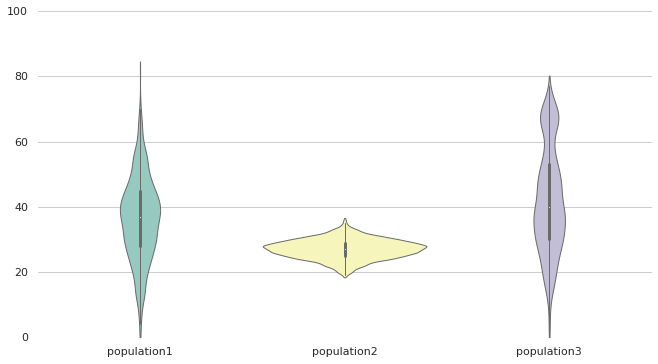

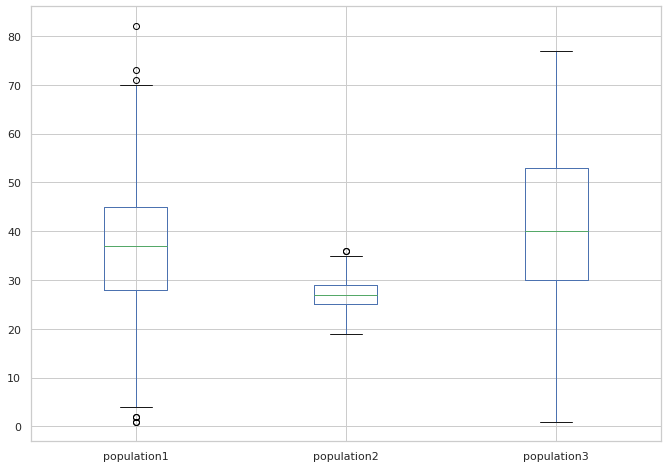

In [119]:
# your code here

# I calculate the quartiles of Population1, Population2 and Population3

p1_list=df_population['observation'].tolist()
p1_list.sort()
qu1, qu2, qu3, qu4 = my_Quartiles(p1_list)

print(f'Q1={qu1} Q2={qu2} Q3={qu3} Q4={qu4} of Population 1')

p2_list=df_population2['observation'].tolist()
p2_list.sort()
q1, q2, q3, q4 = my_Quartiles(p2_list)

print(f'Q1={q1} Q2={q2} Q3={q3} Q4={q4} of Population 2')

p3_list=df_population3['observation'].tolist()
p3_list.sort()

Q1, Q2, Q3, Q4 = my_Quartiles(p3_list)

print(f'Q1={Q1} Q2={Q2} Q3={Q3} Q4={Q4} of Population 3')

# we join in an unique table the three populations

df_joined=pd.concat([df_population, df_population2, df_population3], axis=1)
df_joined.columns=['population1','population2','population3']

# we plot a violin plot

sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(11, 6))
sns.violinplot(data=df_joined, palette="Set3", bw=.2, cut=1, linewidth=1)
ax.set(ylim=(0, 100))
sns.despine(left=True, bottom=True)

# we plot a box plot

ax2=df_joined.plot.box(figsize=(11.3,8))

In [ ]:
"""
your comments here

POPULATION 1
Age Range = 1-82
Total population=1000
mean=36,56
standard deviation=12,81
Q3-Q1=45-28=17

POPULATION2
Age Range = 19-36
Total population=100O
mean=27,15
standard deviation=2,97
Q3-Q1=29-25=4

POPULATION3
Age Range = 1-77
Total population=100O
mean=41,98
standard deviation=16,14
Q3-Q1=30-53=23

>> You can compare the distribution of each population in the violin plot. It is very clear the big differences between Population2 and
the others.
    - It is a young population. Between 20-36. The main population is concentrated around the mean (27,15)
    - The others Population are similar with slight difference distribution.
    - In Population1 the population are concentrated around the mean (36,56) and they are very spread
    - In Population3 the population are concentrated around two points (the mean and the age 68 aprox.)
    - There are few outliers in general.
    - Population2 = the youngest
    - Population1 = a little younger than Population3
    - Population3 = the oldest


"""